## Diwali Sales Analysis

#### Project by: Anish Deshpande

In [1]:
# Importing necessary liraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset

df = pd.read_csv('Diwali Sales Data.csv',header=0,encoding='latin1')

In [3]:
# Let's have a glance at our dataset

df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Exploring

In [4]:
# checking the number of rows and columns in our dataset

df.shape

(11251, 15)

In [5]:
# Check the overall entries

df.size

168765

In [6]:
# Let's inspect the dtypes for all olumns 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
# Statistical view of the numerical columns

df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


## Data Cleaning

In [8]:
# First thing we can see is there are two empty columns that is Status and unnamed1. We need to drop them

df.drop(columns=['Status','unnamed1'],inplace=True)

In [9]:
# Let's check for null values

df.isna().sum() /len(df)        # There are few null values in the Amount column. Let's look at them

User_ID             0.000000
Cust_name           0.000000
Product_ID          0.000000
Gender              0.000000
Age Group           0.000000
Age                 0.000000
Marital_Status      0.000000
State               0.000000
Zone                0.000000
Occupation          0.000000
Product_Category    0.000000
Orders              0.000000
Amount              0.001067
dtype: float64

In [10]:
df[df["Amount"].isna()]         # These are Missing completely at random and since these null values constitutes 
                                # only upto 0.001%. Let's go ahead and drop them

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN
14,1003858,Cano,P00293742,M,46-50,46,1,Madhya Pradesh,Central,Hospitality,Auto,3,NaN
16,1005447,Amy,P00275642,F,46-50,48,1,Andhra Pradesh,Southern,IT Sector,Auto,3,NaN
109,1005265,Sakshi,P00296242,F,46-50,48,1,Delhi,Central,Banking,Footwear & Shoes,1,NaN
111,1005261,Apoorva,P00057942,F,36-45,41,1,Delhi,Central,IT Sector,Footwear & Shoes,2,NaN
184,1005538,Kartik,P00269542,F,46-50,49,1,Karnataka,Southern,Banking,Footwear & Shoes,1,NaN
293,1000326,Jonathan,P00120542,M,51-55,53,0,Gujarat,Western,IT Sector,Footwear & Shoes,3,NaN
344,1002507,Lakshmi,P00045842,F,26-35,35,1,Gujarat,Western,Chemical,Furniture,1,NaN
345,1004498,Srishti,P00030842,F,51-55,55,0,Delhi,Central,Textile,Footwear & Shoes,1,NaN
452,1004601,Gaurav,P00014442,F,36-45,40,1,Madhya Pradesh,Central,Hospitality,Food,4,NaN


In [11]:
# Dropping the null values

df = df.dropna()

In [12]:
# Let's check again for null values

df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

Perfect!

In [13]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770.00


In [14]:
# Let's change the dtype of Amount column to int

df['Amount'] = df['Amount'].astype('int')

## Data Visualization

### Univariate Analysis

Gender 

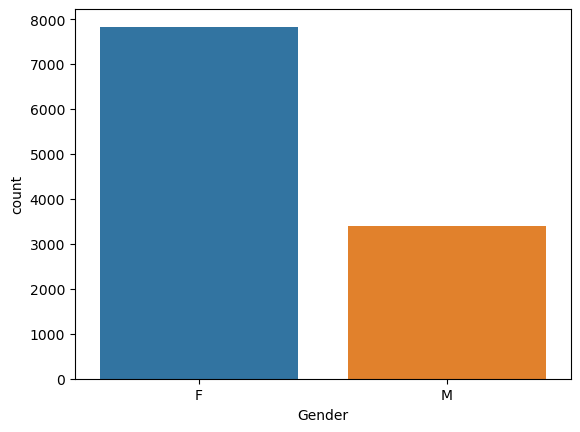

In [15]:
sns.countplot(data=df,x='Gender')
plt.show()

- Females shop more than men

Age Group

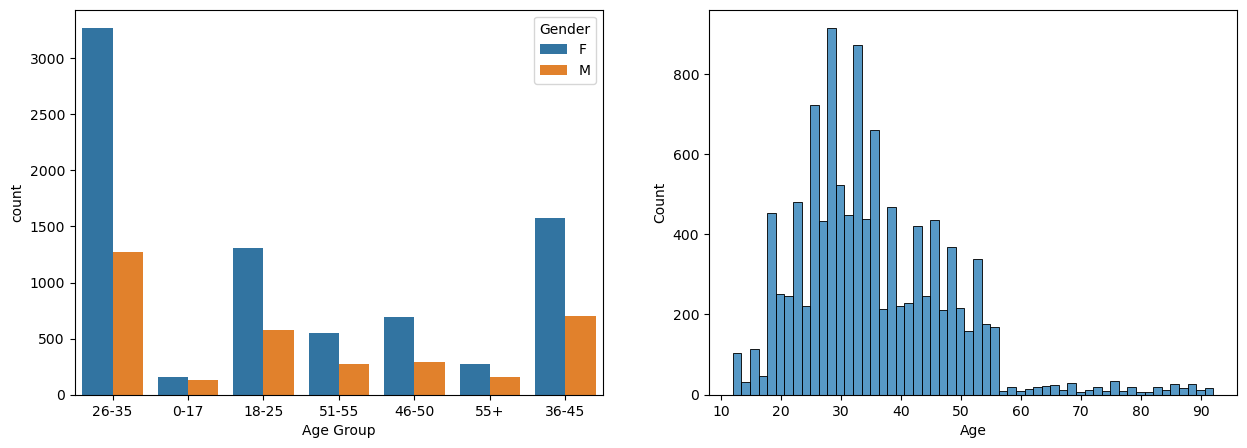

In [16]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
sns.countplot(data = df,x='Age Group',hue='Gender')

plt.subplot(1,2,2)
sns.histplot(df['Age'])
plt.show()

- Maximum shopping is done by youngsters aged between 26 to 35, followerd by 36-45 and 18-25
- People of age 29 can be considered as shopoholic

Occupation

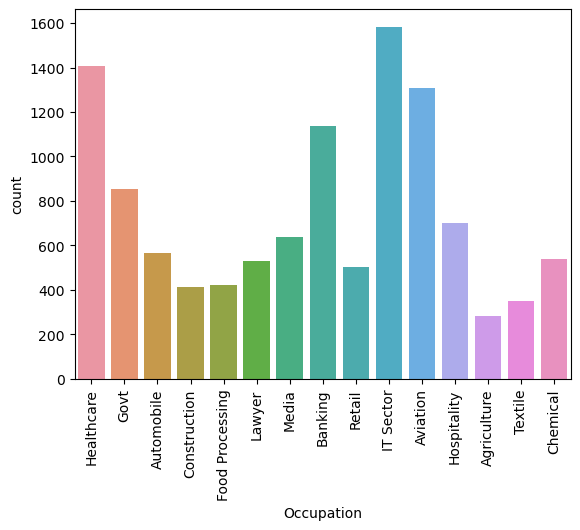

In [17]:
sns.countplot(data=df,x='Occupation')
plt.xticks(rotation=90)
plt.show()

State

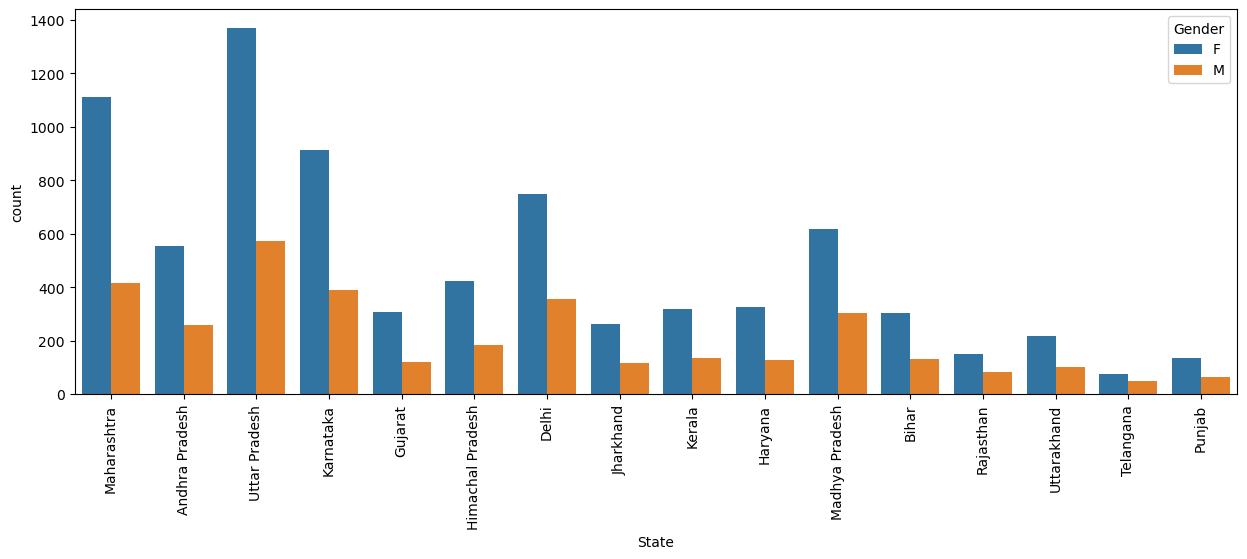

In [18]:
plt.figure(figsize=[15,5])
sns.countplot(data=df,x='State',hue='Gender')
plt.xticks(rotation=90)
plt.show()

- Maximum shoppers are from Uttar pradesh followed by Maharashtra and Karnataka

Zone

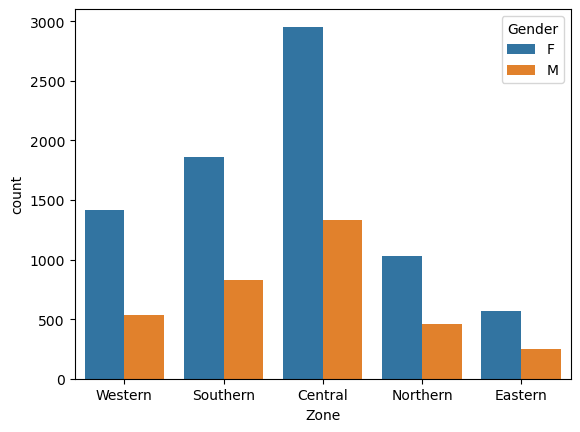

In [19]:
sns.countplot(data=df,x='Zone',hue='Gender')
plt.show()

- Central Zone and Southern regions have higher number of people who shop

### Bivariate Analysis

Gender vs Amount

  Gender    Amount
0      F  74335853
1      M  31913276


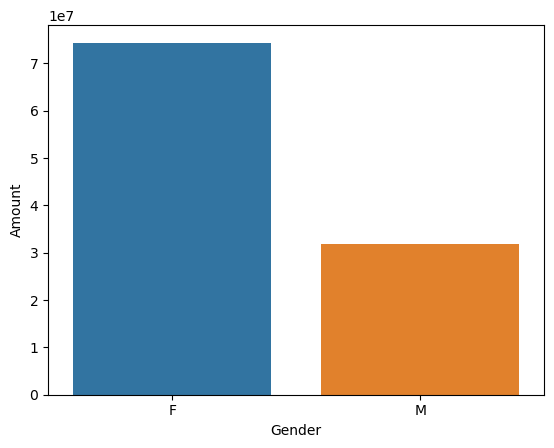

In [20]:
df_gender = df.groupby(by="Gender")["Amount"].sum()

df_gender = df_gender.reset_index()

print(df_gender)

sns.barplot(data = df_gender,x='Gender',y='Amount')
plt.show()

Product_category vs Amount

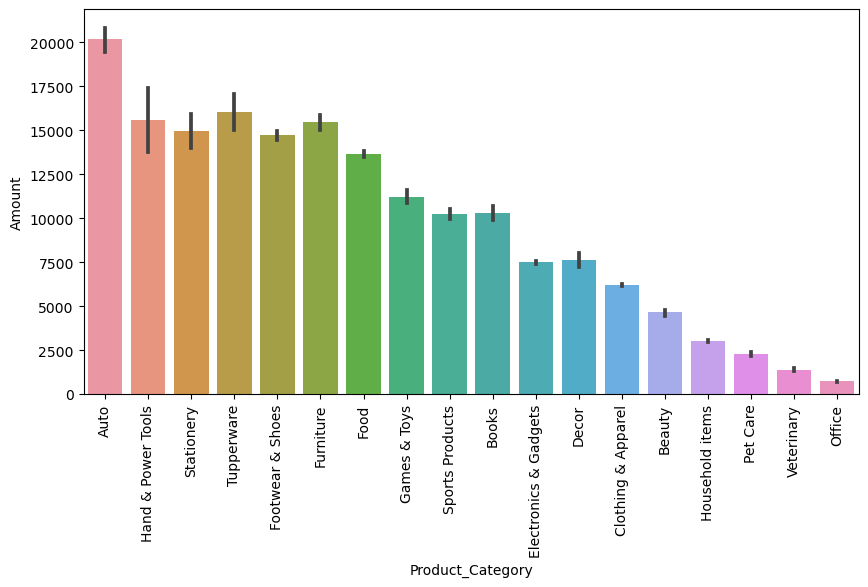

In [21]:
df_category = df.groupby(by='Product_Category')['Amount'].sum()

df_category = df_category.reset_index().sort_values('Amount',ascending=False)

plt.figure(figsize=[10,5])
sns.barplot(data=df,x='Product_Category',y='Amount')
plt.xticks(rotation=90)
plt.show()

State vs Orders

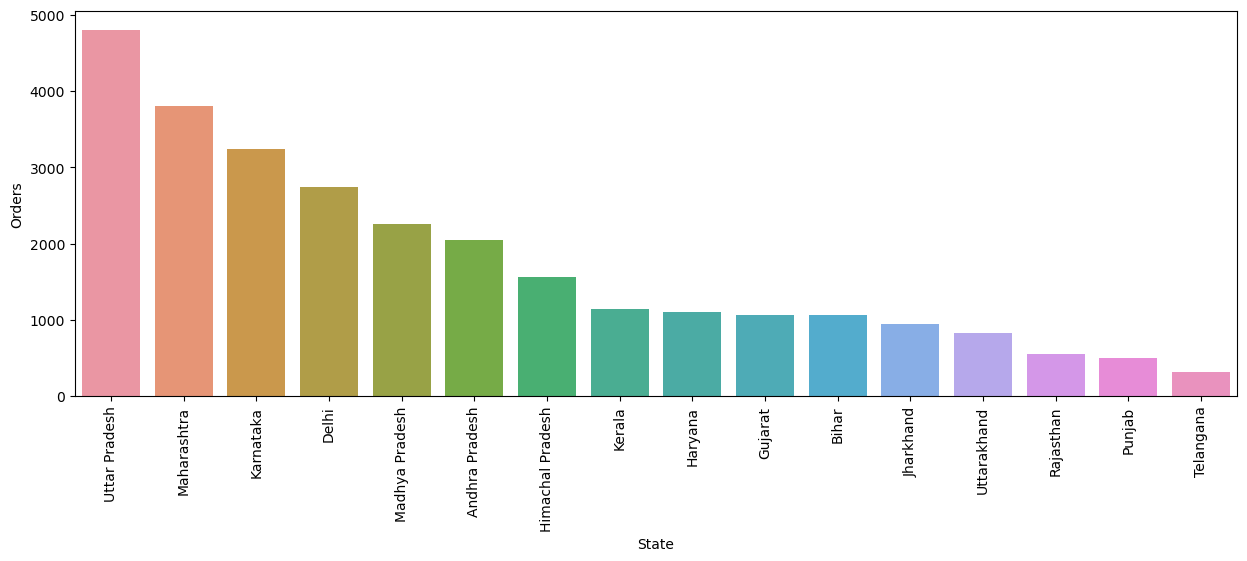

In [22]:
df_state = df.groupby("State")["Orders"].sum()

df_state = df_state.reset_index()

df_state = df_state.sort_values("Orders",ascending=False)

plt.figure(figsize=[15,5])
sns.barplot(data=df_state,x='State',y='Orders')
plt.xticks(rotation=90)
plt.show()

Product_ID vs Orders

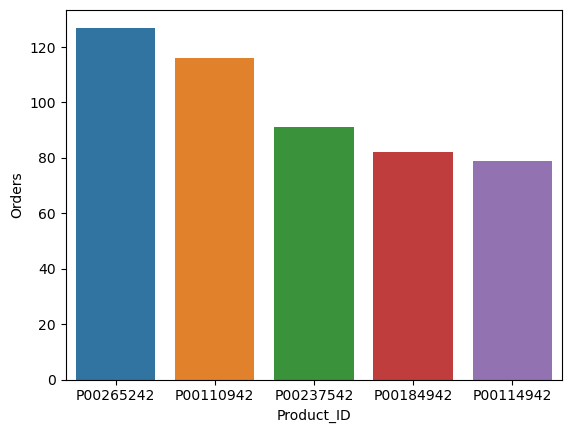

In [23]:
df_product = df.groupby(by='Product_ID')['Orders'].sum()

df_product = df_product.reset_index().sort_values('Orders',ascending=False)

df_product_top5 = df_product.iloc[0:5,:]

sns.barplot(data=df_product_top5,x='Product_ID',y='Orders')
plt.show()

- P00265242,P00110942,P00237542,P00184942,P00114942 are the top 5 most popular products

USER_ID vs Orders and USER_ID vs Amount

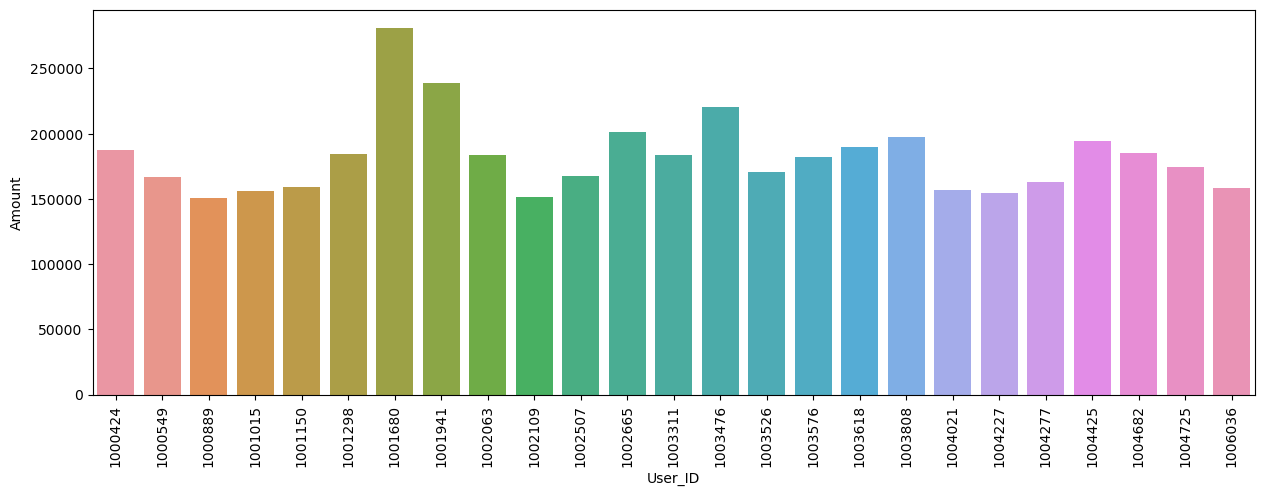

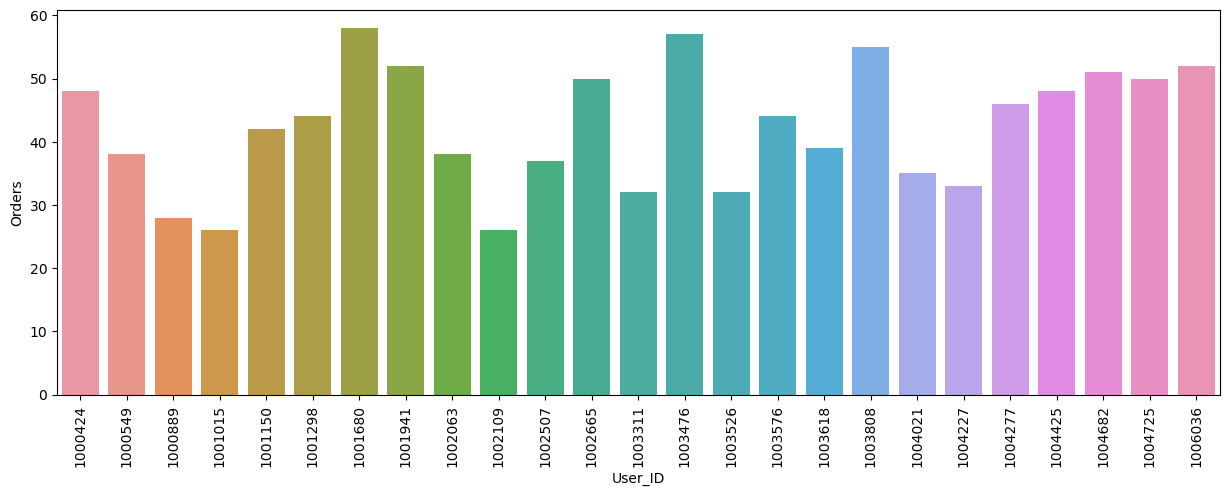

In [24]:
df_users = df.groupby('User_ID')[["Orders","Amount"]].sum()

df_users = df_users.reset_index()

df_users = df_users.sort_values("Amount",ascending=False)

top_25_users = df_users.iloc[0:25,:]

plt.figure(figsize=[15,5])
sns.barplot(data=top_25_users,x='User_ID',y='Amount')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=[15,5])
sns.barplot(data=top_25_users,x='User_ID',y='Orders')
plt.xticks(rotation=90)
plt.show()

## Conclusion

- Company should target people of age 26 to 35,36-45 and 18-25 as they are active shoppers
- Uttar pradesh has the highest shoppers and highest number of orders followed by maharashtra and karnataka 
- Central Zone and Southern regions have higher number of people who shop
- Product Category named Auto has the highest sales
- P00265242,P00110942,P00237542,P00184942,P00114942 are the 5 most popular products
- We can see the top 25 customers with highest orders. The company can offer them some sort of premium cards that will make them to continue shopping  